In [1]:
import os
import time
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 252 samples in 0.000s...
[t-SNE] Computed neighbors for 252 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 252 / 252
[t-SNE] Mean sigma: 1.150430
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.144867
[t-SNE] KL divergence after 300 iterations: 0.368763


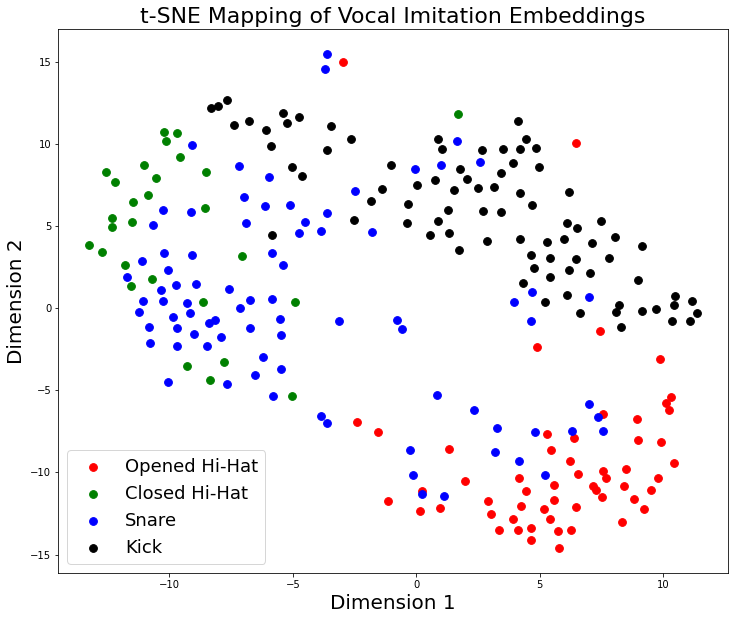

In [4]:
# Check embeddings through t-SNE

#embeddings_ref = np.load('../../data/processed/RI_KSH/embeddings_ref_RI_KSH_0.npy')
#embeddings_imi = np.load('../../data/processed/RI_KSH/embeddings_imi_RI_KSH_0.npy')

embeddings_ref = np.load('../../data/processed/unsupervised/embeddings_ref_unsupervised_0.npy')
embeddings_imi = np.load('../../data/processed/unsupervised/embeddings_imi_unsupervised_0.npy')

classes_ref = np.array([1,1,0,0,0,0,3,3,3,3,3,3,2,2,2,2,2,2])
classes_imi = np.array([1,1,0,0,0,0,3,3,3,3,3,3,2,2,2,2,2,2]*14)

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(embeddings_imi)

fig = plt.figure(figsize=(12,10))

plt.title('t-SNE Mapping of Vocal Imitation Embeddings', fontsize=22)
plt.xlabel('Dimension 1', fontsize=20)
plt.ylabel('Dimension 2', fontsize=20)
indices = np.where(classes_imi==0)[0]
plt.scatter(tsne_results[indices,0], tsne_results[indices,1], c='red', label='Opened Hi-Hat', s=60)
indices = np.where(classes_imi==1)[0]
plt.scatter(tsne_results[indices,0], tsne_results[indices,1], c='green', label='Closed Hi-Hat', s=60)
indices = np.where(classes_imi==2)[0]
plt.scatter(tsne_results[indices,0], tsne_results[indices,1], c='blue', label='Snare', s=60)
indices = np.where(classes_imi==3)[0]
plt.scatter(tsne_results[indices,0], tsne_results[indices,1], c='black', label='Kick', s=60)
plt.legend(fontsize=18)







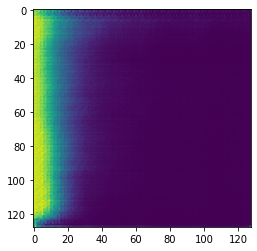

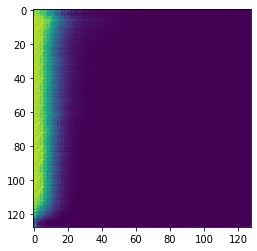

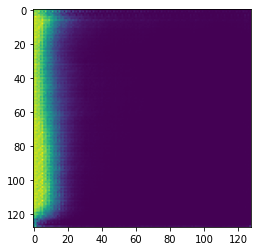

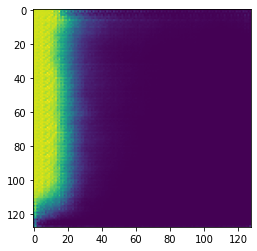

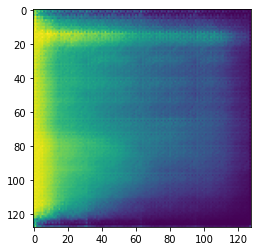

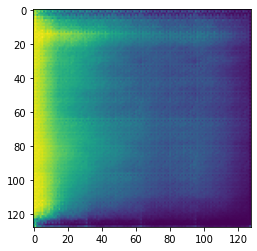

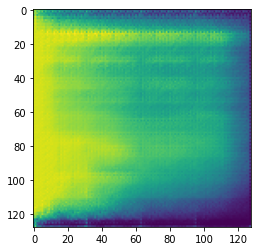

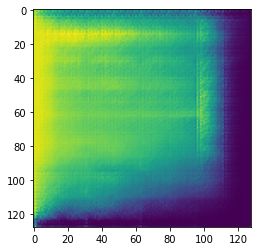

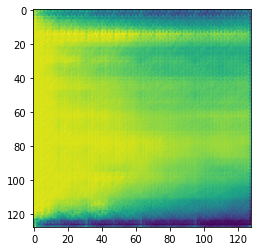

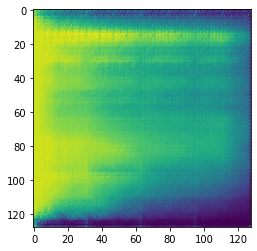

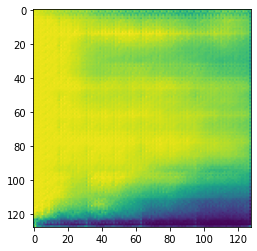

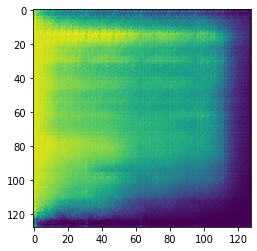

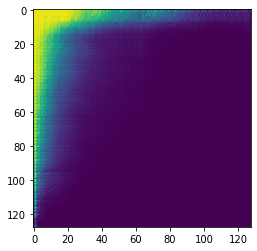

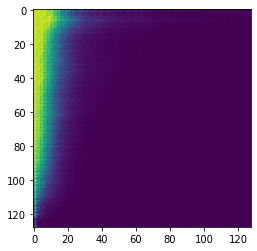

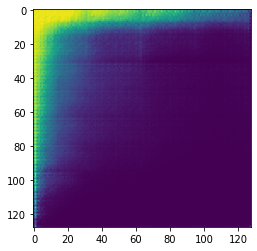

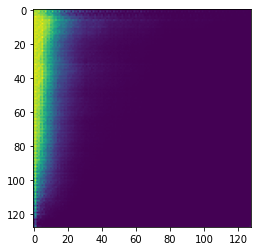

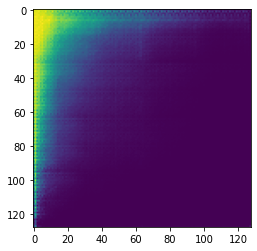

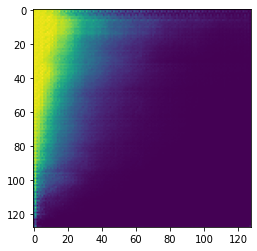

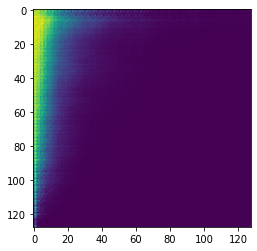

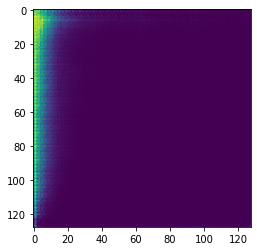

In [5]:
#spectrograms = np.load('../../data/processed/reconstructions/RI_KSH/reconstructions_ref_RI_KSH_0.npy')
#reconstructions = np.load('../../data/processed/reconstructions/RI_KSH/reconstructions_imi_RI_KSH_0.npy')

spectrograms = np.load('../../data/processed/reconstructions/unsupervised/reconstructions_ref_unsupervised_0.npy')
reconstructions = np.load('../../data/processed/reconstructions/unsupervised/reconstructions_imi_unsupervised_0.npy')
originals = np.load('../../data/processed/reconstructions/unsupervised/reconstructions_imi_unsupervised_0.npy')

ns = [0,4,9,15]

for n in ns:

    plt.figure()
    plt.imshow(spectrograms[n,:,:,0])
    plt.show()

    plt.figure()
    plt.imshow(originals[n,:,:,0])
    plt.show()

    plt.figure()
    plt.imshow(reconstructions[n,:,:,0])
    plt.show()

In [4]:
reconstructions.shape

(252, 128, 128, 1)